In [54]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [11]:
data = pd.read_table('data/dev.tsv')
test = pd.read_table('data/eval.tsv')

In [12]:
df = data.copy()
eval = test.copy()


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,136522.0,0.528540,0.263282,0.0,0.3170,0.540000,0.7470,1.000
year,136522.0,1976.796048,25.921025,1921.0,1956.0000,1977.000000,1999.0000,2020.000
acousticness,136522.0,0.502159,0.376037,0.0,0.1020,0.516000,0.8930,0.996
danceability,136522.0,0.537497,0.175972,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,136522.0,231061.453041,127800.577241,5991.0,169933.0000,207493.000000,262267.0000,5403500.000
energy,136522.0,0.482298,0.267538,0.0,0.2550,0.471000,0.7030,1.000
explicit,136522.0,0.084411,0.278005,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,136522.0,0.167172,0.313448,0.0,0.0000,0.000218,0.1030,1.000
key,136522.0,5.193200,3.513427,0.0,2.0000,5.000000,8.0000,11.000
liveness,136522.0,0.205708,0.174404,0.0,0.0989,0.136000,0.2610,1.000


In [15]:
def nan_analysis(df):
    nans = []
    for col in df.columns:
        nans.append([col,df[col].isnull().sum()])

    return pd.DataFrame(nans,columns=['columns','nan counts'])

nans_df = nan_analysis(df)
nans_df

,columns,nan counts
0,valence,0
1,year,0
2,acousticness,0
3,artists,0
4,danceability,0
5,duration_ms,0
6,energy,0
7,explicit,0
8,id,0
9,instrumentalness,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136522 entries, 0 to 136521
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           136522 non-null  float64
 1   year              136522 non-null  int64  
 2   acousticness      136522 non-null  float64
 3   artists           136522 non-null  object 
 4   danceability      136522 non-null  float64
 5   duration_ms       136522 non-null  int64  
 6   energy            136522 non-null  float64
 7   explicit          136522 non-null  int64  
 8   id                136522 non-null  object 
 9   instrumentalness  136522 non-null  float64
 10  key               136522 non-null  int64  
 11  liveness          136522 non-null  float64
 12  loudness          136522 non-null  float64
 13  popularity        136522 non-null  int64  
 14  speechiness       136522 non-null  float64
 15  tempo             136522 non-null  float64
 16  mode              13

Id, artists is categorical - others is numerical

In [17]:
def skew_kurt(df):
    sku = []
    for col in df.columns:
        if col not in ['id','artists']:
            sku.append([col,
                        df[col].kurt(),
                        np.log(df[col]).kurt(),
                        np.sqrt(df[col]).kurt(),
                        df[col].skew(),
                        np.log(df[col]).skew(),
                        np.sqrt(df[col]).skew()
                        ]
                       )

    return pd.DataFrame(sku,columns=['columns','kurt','log kurt','sqrt kurt','skew','log skew','sqrt skew'])

sku = skew_kurt(df)
sku

/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/omid/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,columns,kurt,log kurt,sqrt kurt,skew,log skew,sqrt skew
0,valence,-1.064927,NaN,-0.342404,-0.106713,NaN,-0.647737
1,year,-1.035393,-1.025786,-1.030697,-0.129524,-0.148236,-0.138871
2,acousticness,-1.609341,NaN,-1.252081,-0.032344,NaN,-0.465407
3,danceability,-0.439431,NaN,0.930119,-0.227141,NaN,-0.798956
4,duration_ms,145.804417,3.901500,16.008356,7.725343,-0.060583,2.143917
5,energy,-1.099952,NaN,-0.601682,0.112118,NaN,-0.447452
6,explicit,6.939246,NaN,6.939246,2.989840,NaN,2.989840
7,instrumentalness,0.933780,NaN,0.005635,1.628427,NaN,1.307247
8,key,-1.269181,NaN,-0.491781,0.008761,NaN,-0.757788
9,liveness,5.019822,NaN,1.485129,2.155729,NaN,1.301045


In [58]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def qq_plots(df,col):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot "+ col)
    plt.show()


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


def dist_plot(df,col,per_class = True,trans = None,title=None):

    plt.figure(figsize=(16,6))

    transformation =''

    if per_class and trans is None:
        sns.distplot(df[df['mode']==0][col],
                 color="green", kde=True,bins=120, label='mode 0')
        sns.distplot(df[df['mode']==1][col],
                     color="red", kde=True,bins=120, label='mode 1')
    elif per_class and trans is not None:
        if trans == 'log':
            transformation ='(log)'
            sns.distplot(np.log(df[df['mode']==0][col]),
                 color="green", kde=True,bins=120, label='mode 0')
            sns.distplot(np.log(df[df['mode']==1][col]),
                         color="red", kde=True,bins=120, label='mode 1')
        elif trans == 'sqrt':
            transformation ='(sqrt)'
            sns.distplot(np.sqrt(df[df['mode']==0][col]),
                 color="green", kde=True,bins=120, label='mode 0')
            sns.distplot(np.sqrt(df[df['mode']==1][col]),color="red", kde=True,bins=120, label='mode 1')
        else:
            transformation ='(boxcox)'
            sns.distplot(stats.boxcox(df[df['mode']==0][col])[0],
                 color="green", kde=True,bins=120, label='mode 0')
            sns.distplot(stats.boxcox(df[df['mode']==1][col])[0],
                         color="red", kde=True,bins=120, label='mode 1')
    else:
        if trans is None:
            sns.distplot(df[col],
                 color="green", kde=True,bins=120, label='mode 0')
        elif trans is not None:
            if trans == 'log':
                sns.distplot(np.log(df[col]),
                 color="green", kde=True,bins=120, label='mode 0')
            elif trans == 'sqrt':
                sns.distplot(np.sqrt(df[col]),
                 color="green", kde=True,bins=120, label='mode 0')
            else:
                sns.distplot(stats.boxcox(df[col])[0],
                 color="green", kde=True,bins=120, label='mode 0')

    if title is None:
        plt.title("Distribution of "+col+" "+transformation)
    else:
        plt.title(title)

    plt.legend()
    plt.show()



def box_plot(df,col,trans=None,title=None):
    transformation =''
    plt.figure(figsize=(16,6))
    if trans is None:
        sns.boxplot(data=df,y=col,x='mode',hue='mode')
    elif trans =='log':
        transformation ='(log)'
        sns.boxplot(data=np.log(df[[col,'mode']]),y=col,x='mode',hue='mode')
    elif trans =='sqrt':
        transformation ='(sqrt)'
        sns.boxplot(data=np.sqrt(df[[col,'mode']]),y=col,x='mode',hue='mode')

    if title is None:
        plt.title("box plot of "+col+" "+transformation)
    else:
        plt.title(title)
    plt.legend()
    plt.show()

def violin_plot(df,col,trans=None,title=None):
    transformation =''

    plt.figure(figsize=(16,6))

    if trans is None:
        sns.violinplot(data=df,y=col,x='mode',hue='mode')
    elif trans =='log':
        transformation ='(log)'
        sns.violinplot(data=np.log(df[[col,'mode']]),y=col,x='mode',hue='mode')
    elif trans =='sqrt':
        transformation ='(sqrt)'
        sns.violinplot(data=np.sqrt(df[[col,'mode']]),y=col,x='mode',hue='mode')

    if title is None:
        plt.title("violin plot of "+col+" "+transformation)
    else:
        plt.title(title)

    plt.legend()
    plt.show()




<Figure size 720x288 with 0 Axes>

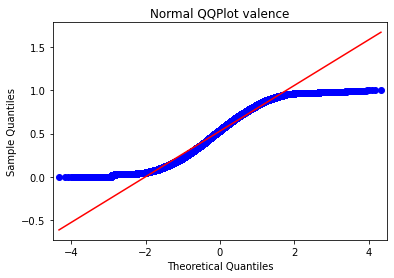

<Figure size 720x288 with 0 Axes>

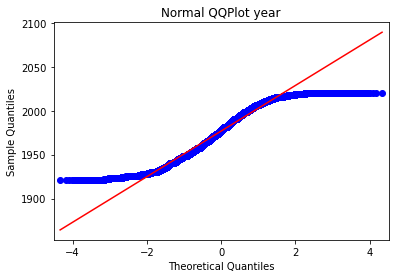

<Figure size 720x288 with 0 Axes>

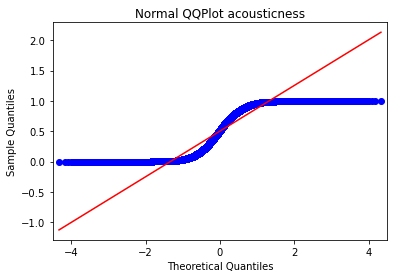

<Figure size 720x288 with 0 Axes>

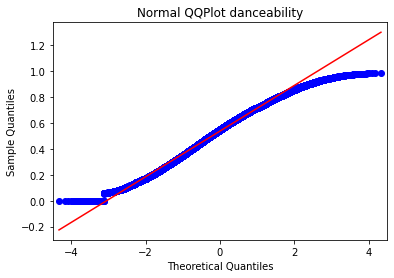

<Figure size 720x288 with 0 Axes>

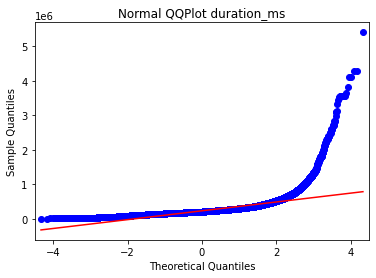

<Figure size 720x288 with 0 Axes>

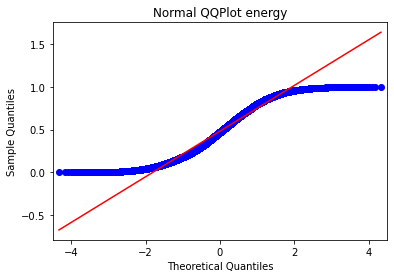

<Figure size 720x288 with 0 Axes>

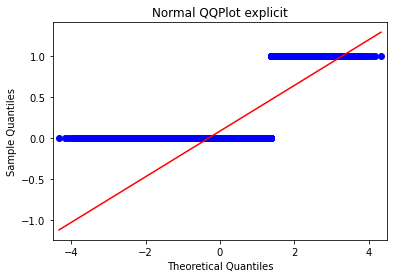

<Figure size 720x288 with 0 Axes>

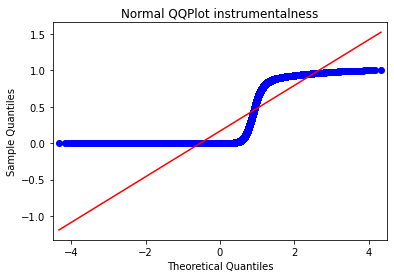

<Figure size 720x288 with 0 Axes>

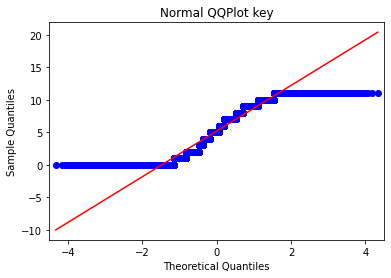

<Figure size 720x288 with 0 Axes>

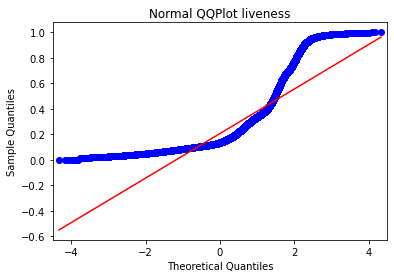

<Figure size 720x288 with 0 Axes>

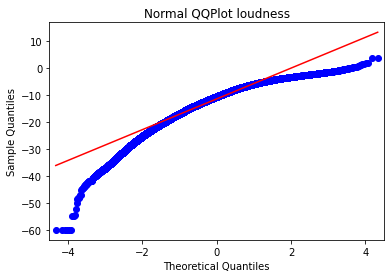

<Figure size 720x288 with 0 Axes>

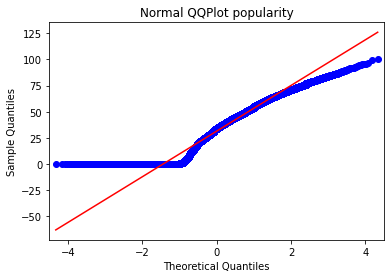

<Figure size 720x288 with 0 Axes>

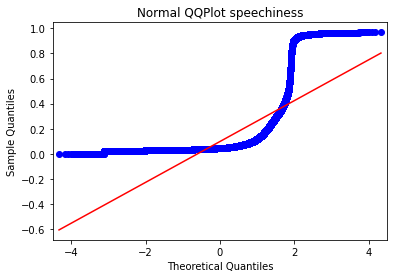

<Figure size 720x288 with 0 Axes>

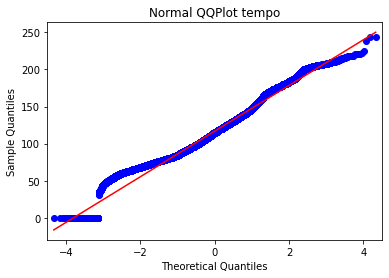

<Figure size 720x288 with 0 Axes>

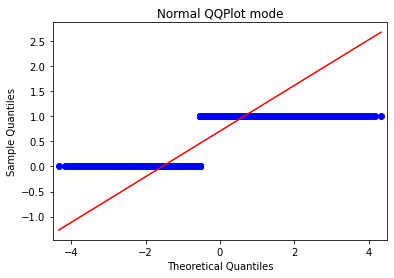